Student's Name and Email Address

Boise State University, Department of Chemistry and Biochemistry

## CHEM 324: PChem Lab {-}
# Worksheet 4: UV-Vis Spectroscopy of Conjugated Dyes {-}

Set the local path, even though we will not need to read files

## Task 1: A Particle in a Box Model with no Parameters {-}

For the first task, we will consider the hypothesis that for all the molecules in the experiment, the electrons in $\pi$ orbitals behave as free electrons in a one-dimensional box. The energy levels of particles in a box only depend on basic physical constants and the length of the box $L$ according to the formula $E_n=\frac{h^2n^2}{8mL}$, where $n$ is a quantum number that identifies the step in the ladder of single-electron states. The absorption maximum will correspond to the highest occupied state being excited to the lowest unoccupied state. For a system with $N$ $\pi$ electrons, the difference in energy between the two states is $\Delta E = \frac{h^2}{8mL}(N+1)$, which corresponds to an absorption wavelength of $\lambda^{FE}=\frac{8mc}{h}\frac{L^2}{N+1}$. For the conjugated systems in our experiments, the number of electrons is $N=p+3$ and the length of the box can be assumed to be $L=(p+3)l$, where $p$ is the number of carbon atoms in between the two nitrogens, while $l=0.139$ nm is the typical C-C bond length in aromatic systems. Accounting for all the constants, the free electrons (particle in a box) prediction for the absorption maximum is $\lambda^{FE}(\textrm{in nm})=63.7\frac{(p+3)^2}{p+4}$.

* For each molecule, compute the expected absorption maximum in the free electron (particle in a box) picture using the formula above in terms of $p$. Compute the deviation from the experiments of this model in terms of the sum of errors squared, i.e. $RSS=\sum_i(\lambda^{exp}_i-\lambda^{FE}_i)^2$
* Make a scatter plot of the experimental absorption maximum for all the molecules together with your prediction. Compute the coefficient of determination $R^2=1-RSS/TSS$ from the residual sum of square and the total sum of squares, $TSS=\sum_i(\lambda^{exp}_i-\bar{\lambda}^{exp})^2$.

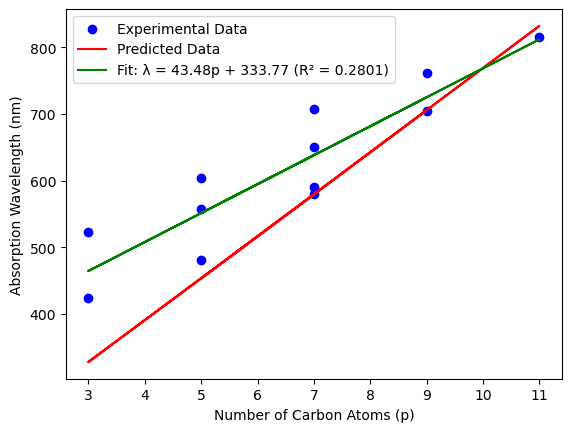

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

# Define the function for the particle in a box model
def lambda_FE(p):
    return 63.7 * ((p + 3)**2) / (p + 4)

# Define the dyes data if not already created
dyes_data = pd.DataFrame([
    {'cas': '977-96-8', 'p': 3, 'lambda_exp': 522.991943},
    {'cas': '605-91-4', 'p': 5, 'lambda_exp': 604.003479},
    {'cas': '4727-49-5', 'p': 7, 'lambda_exp': 590.018250},
    {'cas': '14187-31-6', 'p': 7, 'lambda_exp': 707.012146},
    {'cas': '4727-50-8', 'p': 9, 'lambda_exp': 705.008301},
    {'cas': '18300-31-7', 'p': 11, 'lambda_exp': 814.993225},
    {'cas': '2197-01-5', 'p': 3, 'lambda_exp': 423.012695},
    {'cas': '905-97-5', 'p': 5, 'lambda_exp': 557.017883},
    {'cas': '514-73-8', 'p': 7, 'lambda_exp': 650.993408},
    {'cas': '3071-70-3', 'p': 9, 'lambda_exp': 762.0},
    {'cas': '905-96-4', 'p': 5, 'lambda_exp': 479.995789},
    {'cas': '14806-50-9', 'p': 7, 'lambda_exp': 579.984802}
])

# Compute the expected lambda_FE for each molecule
dyes_data['lambda_FE'] = dyes_data['p'].apply(lambda_FE)

# Compute RSS and TSS
RSS = np.sum((dyes_data['lambda_exp'] - dyes_data['lambda_FE'])**2)
TSS = np.sum((dyes_data['lambda_exp'] - dyes_data['lambda_exp'].mean())**2)
R2 = 1 - RSS / TSS

# Fit a linear regression line to the data for the trendline equation
slope, intercept, r_value, p_value, std_err = stats.linregress(dyes_data['p'], dyes_data['lambda_exp'])

# Plot the experimental data and the predicted trendline
plt.scatter(dyes_data['p'], dyes_data['lambda_exp'], label='Experimental Data', color='blue')
plt.plot(dyes_data['p'], dyes_data['lambda_FE'], color='red', label='Predicted Data')

# Plot the best fit line (from the regression)
plt.plot(dyes_data['p'], slope * dyes_data['p'] + intercept, color='green', label=f'Fit: λ = {slope:.2f}p + {intercept:.2f} (R² = {R2:.4f})')

# Adding labels and title
plt.xlabel('Number of Carbon Atoms (p)')
plt.ylabel('Absorption Wavelength (nm)')
plt.legend()

# Show the plot
plt.show()

## Task 2: A Single-Parameter Model {-}

The model described above is clearly simplified. We could try to improve it by including the effect of the aromatic rings on the potential of the box. For example, we could assume that the presence of the aromatic rings soften the box, so that the effective lenght is a bit larger than the one used above. This could be achieved by introducing an empirical parameter $\alpha$ in the equation, as follows $\lambda^{FE}(\textrm{in nm})=63.7\frac{(p+3+\alpha)^2}{p+4}$.
The parameter $\alpha$ needs to be determined from the experimental results (fit). Similar to standard least-squares fit, we want to identify the value of the parameter that minimizes the sum of errors squared, i.e. the $RSS$. This can be done in a few alternative ways: 

* Given the experimental values of $\lambda$, we could compute the optimal alpha for each molecule and than take the average over all the molecules.
* More accurately, we could generate a range of values of $\alpha$ and for each of them compute the $RSS$. The best fit is the one for which the $RSS$ is the lowest. 
* We could linearize the dependence on $p$ in the formula above and use linear regression to fit the experimental data. From the slope and/or intercept we could estimate $\alpha$. 

Choose one of the approaches above and determine the value of $\alpha$ the best reproduces the experiments. Plot the experimental points together with the fitted model and compute the $R^2$ of the fit. 

## Task 3: Fitting Different Series {-}

We could extend the idea above by introducing more empirical parameters in the model. In particular, the size and shape of the one-dimensional box may be affected by the presence of sulfur or oxygen atoms at the two edges. For this reason, we want to investigate the possibility to improve our particle in a box model by individually fitting the three different series of molecules: the ones with no S nor O, the ones containing S, and the ones containing O. The dataset contains two additional variables ('hasS' and 'hasO') that you can use to filter the entries. 

* Repeat the calculations above to individually fit the particle-in-a-box model for the three series of molecules and compute the relative $R^2$ values. 
* Make a scatter plot in which the three series of molecules are reported with different colors and markers. Add the three fits to the plot.
* For each series of molecules, plot the measured UV-Vis spectra showing the changes in electronic excitations as the conjugation increases. You can use Python (recommended) or any other tool to prepare these Figures. 
* Comment on your results (2-3 sentences). Is the improvement in the models significant enough to justify adding more parameter? Do the fitted parameters have a chemical/physical meaning? 

YOUR COMMENTS HERE

## Task 4: Multivariate Fits {-}

While the particle-in-a-box fitting is motivated by physical reasons, we could try to fit all our data with a linear model but using a multivariate regression, i.e. by using multiple independent variables (features) for our fit. In particular, we could use both the number of carbon atoms and the two categorical variables 'hasS' and 'hasO' as independent variables for our linear regression algorithm. 

* Perform a linear regression using 'p', 'hasS', ans 'hasO' as features to predict 'lamba'. How many parameters are we fitting in this model? What is the resulting $R^2$? 
* Make a scatter plot of the experimental data and of the predicted data from the model.  


Using features related to the molecular structure to predict molecular properties is becoming a common strategy in machine-learning for chemical applications. The two features that we used above have obvious reasons to be linked to the absorption maximum, as we have seen when discussing the particle-in-a-box physics-based models. However, it is possible that other characteristics of the molecules have some strong connection with their excitation energies. Is there a single variable or a combination of variables that can predict the experimental absorption maximumum with higher accuracy? 

* Explore different variables that could be linked to the absorption maximum. For example, you may consider the total number of aromatic C, the total number of heteroatoms, the first two digits of the CAS code, etc. 
* Plot your best results and comment on this approach.

YOUR COMMENTS HERE

In [3]:
# This cell is used to allow Google Colab to install the tools to convert the notebook to a pdf file
# Un-comment the following lines when you are ready to export the pdf 
#!apt-get install texlive texlive-xetex texlive-latex-extra pandoc
#!pip install pypandoc

In [4]:
# Use this command to convert the finished worksheet into a pdf 
# NOTE : you may want to change the path of the file, if you are working in a different folder of the Google Drive
#!jupyter nbconvert --no-input --to PDF "/content/drive/MyDrive/Colab Notebooks/ParticleBox_Worksheet.ipynb"